# Proyecto ds4a EDA

Read dataset of 10 years

In [2]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import pandas                as pd
import matplotlib.pyplot     as plt


import folium  
from folium.plugins import HeatMap

from   collections           import Counter
from   sklearn               import preprocessing
from   datetime              import datetime
from   collections           import Counter
from   math                  import exp
from   sklearn.linear_model  import LinearRegression as LinReg
from   sklearn.metrics       import mean_absolute_error
from   sklearn.metrics       import median_absolute_error
from   sklearn.metrics       import r2_score

%matplotlib inline
sns.set()

In [3]:
import json
import requests
import os
import datetime

In [4]:
accidents_file = os.path.join(os.getcwd(),'/home/bibianamolina/DS4A-traffic-project/eda/accident_clean.csv')
accidents = pd.read_csv(accidents_file,sep=',')
accidents.head(3)

,x,y,accident_id,year,address,severity,accident_type,severity_numeric,borough_geo,timestamp,date,hour,month_name,month,day
0,-74.039690,4.759877,360471,2010,AK 18A-CL 182 58,Material damage,Crash,1,USAQUEN,2010-05-25 20:10:00+00:00,2010-05-25,20,May,5,Tue
1,-74.114296,4.615476,305838,2008,TR 49-3 02,Material damage,Crash,1,PUENTE ARANDA,2008-09-30 07:00:00+00:00,2008-09-30,7,Sep,9,Tue
2,-74.105296,4.509792,4437952,2016,CL 80A-KR 1 SE 02,Injury,Crash,8,USME,2016-02-27 16:20:00+00:00,2016-02-27,16,Feb,2,Sat


In [5]:
len(accidents)

405348

In [6]:
accidents_f=accidents[accidents['year']>2014].reset_index(drop=True)
accidents_f

,x,y,accident_id,year,address,severity,accident_type,severity_numeric,borough_geo,timestamp,date,hour,month_name,month,day
0,-74.105296,4.509792,4437952,2016,CL 80A-KR 1 SE 02,Injury,Crash,8,USME,2016-02-27 16:20:00+00:00,2016-02-27,16,Feb,2,Sat
1,-74.167225,4.631051,4472304,2017,AV AVENIDA CIUDAD DE CALI-CL 42 S 02,Injury,Run over,9,KENNEDY,2017-02-09 16:45:00+00:00,2017-02-09,16,Feb,2,Thu
2,-74.121790,4.603106,4512837,2018,AV AVENIDA PRIMERA DE MAYO-KR 50A 14,Injury,Crash,8,PUENTE ARANDA,2018-03-25 12:10:00+00:00,2018-03-25,12,Mar,3,Sun
3,-74.075332,4.607944,4437462,2016,KR 13-CL 18 02,Injury,Crash,8,SANTA FE,2016-02-22 08:55:00+00:00,2016-02-22,8,Feb,2,Mon
4,-74.064965,4.744182,4473374,2017,AV AVENIDA BOYACA-CL 160 02,Injury,Run over,9,SUBA,2017-02-19 13:00:00+00:00,2017-02-19,13,Feb,2,Sun
5,-74.023482,4.766878,4426757,2015,KR 3-CL 189C 02,Injury,Run over,9,USAQUEN,2015-10-17 21:00:00+00:00,2015-10-17,21,Oct,10,Sat
6,-74.072893,4.598232,4404972,2015,KR 5-CL 12 28,Injury,Crash,8,CANDELARIA,2015-02-17 08:10:00+00:00,2015-02-17,8,Feb,2,Tue
7,-74.158180,4.639044,4412227,2015,AV AVENIDA CIUDAD DE CALI-CL 2 S 02,Material damage,Crash,1,KENNEDY,2015-05-07 05:50:00+00:00,2015-05-07,5,May,5,Thu
8,-74.085291,4.681941,4504660,2017,CL 74B-KR 68G 02,Material damage,Crash,1,ENGATIVA,2017-12-28 18:45:00+00:00,2017-12-28,18,Dec,12,Thu
9,-74.178939,4.624160,4508319,2018,KR 86-CL 53 S 2,Injury,Crash,8,BOSA,2018-02-13 07:45:00+00:00,2018-02-13,7,Feb,2,Tue


In [9]:
col=accidents_f.columns
col#.to_latex(index=False)

Index(['x', 'y', 'accident_id', 'year', 'address', 'severity', 'accident_type',
       'severity_numeric', 'borough_geo', 'timestamp', 'date', 'hour',
       'month_name', 'month', 'day'],
      dtype='object')

In [10]:
accidents_f.shape

(160884, 15)

In [11]:
pd.crosstab(accidents_f.borough_geo,accidents_f.severity).sort_values('Fatality')

severity,Fatality,Injury,Material damage
borough_geo,,,
SUMAPAZ,1,9,7
CANDELARIA,23,392,762
ANTONIO NARIÑO,55,1267,1613
SANTA FE,70,1854,2916
CHAPINERO,79,2325,7985
LOS MARTIRES,87,1964,3300
BARRIOS UNIDOS,88,2275,6187
SAN CRISTOBAL,98,1521,1376
TEUSAQUILLO,101,2365,6497


# Accidents by year 2007-2019

In [95]:
by_year=accidents_f['year'].value_counts(sort=True).rename_axis('year').reset_index(name='Total').sort_values(by='year').reset_index(drop=True)
by_year

,year,Total
0,2015,30429
1,2016,33992
2,2017,34142
3,2018,33201
4,2019,29120


In [162]:
b=pd.crosstab(accidents_f.year, accidents_f.severity)
b

severity,Fatality,Injury,Material damage
year,,,
2015,529,10315,19585
2016,567,10244,23181
2017,538,10022,23582
2018,500,11148,21553
2019,493,10218,18409


In [97]:
by_year=accidents_f['year'].value_counts(sort=True).rename_axis('year').reset_index(name='counts').sort_values(by='year').reset_index(drop=True)
by_year

,year,counts
0,2015,30429
1,2016,33992
2,2017,34142
3,2018,33201
4,2019,29120


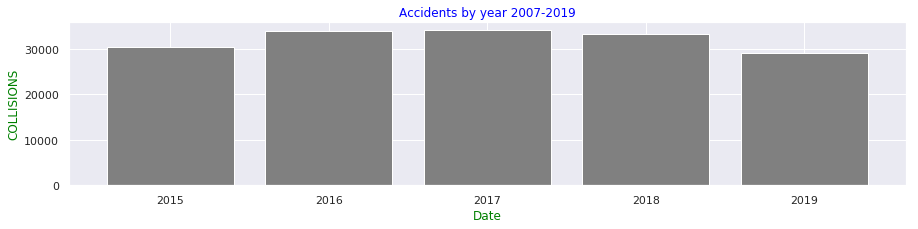

In [98]:
fig, ax = plt.subplots(figsize=(15,3))
ax.bar(by_year['year'], by_year['counts'],color='gray')
plt.title('Accidents by year 2007-2019', color="blue")
plt.xlabel('Date',color="green");
plt.ylabel('COLLISIONS',color="green");

# Accidents by hour 20015-2019

In [99]:
accidents_f['hour']=pd.to_datetime(accidents_f['timestamp']).apply(lambda x: x.hour)
by_hour=accidents['hour'].value_counts(sort=True).rename_axis('hour').reset_index(name='counts').sort_values(by='hour').reset_index(drop=True)
by_hour

,hour,counts
0,0,4772
1,1,4035
2,2,3578
3,3,4164
4,4,4620
5,5,10646
6,6,19220
7,7,24824
8,8,22993
9,9,20269


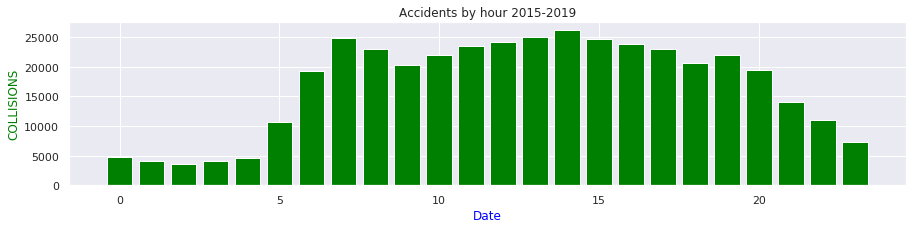

In [100]:
fig, ax = plt.subplots(figsize=(15,3))
ax.bar(by_hour['hour'], by_hour['counts'],color='green')
plt.title('Accidents by hour 2015-2019')
plt.xlabel('Date',color="blue");
plt.ylabel('COLLISIONS',color="green");

# Accidents by month 2007-2019

In [ ]:
accidents['MONTH_ACC']=accidents['FECHA_HORA_ACC'].apply(lambda x: x.month)
by_month=accidents['MONTH_ACC'].value_counts(sort=True).rename_axis('month').reset_index(name='counts').sort_values(by='month').reset_index(drop=True)
by_month


In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
ax.bar(by_month['month'], by_month['counts'],color='darkgreen')
plt.title('Accidents by month 2007-2019', color="red")
plt.xlabel('Date',color="blue");
plt.ylabel('COLLISIONS',color="green");

# Accidents by day 2007-2019

In [ ]:
accidents['DAY_ACC']=accidents['FECHA_HORA_ACC'].apply(lambda x: x.day_name())
accidents_by_weeday=accidents[['DAY_ACC','CODIGO_ACCIDENTE']].groupby(['DAY_ACC']).count().reset_index()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accidents_by_weeday['DAY_ACC'] = pd.Categorical(accidents_by_weeday['DAY_ACC'], categories=cats, ordered=True)
accidents_by_weeday = accidents_by_weeday.sort_values('DAY_ACC')
accidents_by_weeday

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(accidents_by_weeday['DAY_ACC'], accidents_by_weeday['CODIGO_ACCIDENTE'],color='darkblue')
plt.title('accidents_by_weeday 2007-2019', color="blue")
plt.xlabel('Date',color="green");
plt.ylabel('COLLISIONS',color="green");

# by localidad

In [ ]:
accidents_by_LOC=accidents[['LOCALIDAD','CODIGO_ACCIDENTE']].groupby(['LOCALIDAD']).count().reset_index().sort_values(by='CODIGO_ACCIDENTE',ascending=False)
accidents_by_LOC

In [ ]:
fig, ax = plt.subplots(figsize=(18,4))
ax.bar(accidents_by_LOC['LOCALIDAD'], accidents_by_LOC['CODIGO_ACCIDENTE'],color='#641c34')
plt.title('accidents_by_loc 2007-2019', color="blue")
plt.xlabel('Loc',color="green")
plt.xticks(rotation=45)
plt.ylabel('COLLISIONS',color="green");

# by accident type

In [ ]:
accidents_by_type=accidents[['CLASE_ACC','CODIGO_ACCIDENTE']].groupby(['CLASE_ACC']).count().sort_values(by='CODIGO_ACCIDENTE',ascending=False).reset_index()
accidents_by_type

In [ ]:
fig, ax = plt.subplots(figsize=(18,4))
ax.bar(accidents_by_type['CLASE_ACC'], accidents_by_type['CODIGO_ACCIDENTE'],color='#2f5687')
plt.title('accidents_by_loc 2007-2019', color="blue")
plt.xlabel('Loc',color="green")
plt.xticks(rotation=45)
plt.ylabel('COLLISIONS',color="green");

In [ ]:
accidents_by_grav=accidents[['GRAVEDAD','CODIGO_ACCIDENTE']].groupby(['GRAVEDAD']).count().sort_values(by='CODIGO_ACCIDENTE',ascending=False).reset_index()
accidents_by_grav

In [ ]:
fig, ax = plt.subplots(figsize=(18,4))
ax.bar(accidents_by_grav['GRAVEDAD'], accidents_by_grav['CODIGO_ACCIDENTE'],color='#4d6423')
plt.title('accidents_by_gravuty 2007-2019', color="blue")
plt.xlabel('Loc',color="green")
plt.xticks(rotation=45)
plt.ylabel('COLLISIONS',color="green");

# More EDA

# BOGOTA MAP

In [ ]:
folium_map = folium.Map(location=[4.624335, -74.063644],
                        zoom_start=13,
                        tiles="OpenStreetMap")
folium_map

In [ ]:
folium_map = folium.Map(location=[4.624335, -74.063644],
                        zoom_start=13,
                        tiles="OpenStreetMap")
#Now we can have a scatter plot of the first 1000 data points on the above map
for i in range(0,10000):
    marker = folium.CircleMarker(location=[accidents["Y"][i],accidents["X"][i]],radius=5,color="red",fill=True)
    marker.add_to(folium_map)

folium_map

In [131]:
list(accidents_f.severity.unique())

['Injury', 'Material damage', 'Fatality']

In [128]:
weather = pd.read_csv('/home/bibianamolina/DS4A-traffic-project/eda/total.csv',sep=',')
weather.head(3)

,Unnamed: 0,Unnamed: 0.1,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,...,cloudCover,uvIndex,visibility,windBearing,location,windGust,pressure,precipType,ozone,precipAccumulation
0,0,0,2014-07-15 05:00:00,Partly Cloudy,partly-cloudy-night,0.0,0.0,10.0,10.0,9.99,...,0.44,0.0,10.003,NaN,bosa,NaN,NaN,NaN,NaN,NaN
1,1,1,2014-07-15 06:00:00,Partly Cloudy,partly-cloudy-night,0.0,0.0,9.0,9.0,9.00,...,0.44,0.0,10.003,50.0,bosa,NaN,NaN,NaN,NaN,NaN
2,2,2,2014-07-15 07:00:00,Partly Cloudy,partly-cloudy-night,0.0,0.0,9.0,9.0,9.00,...,0.44,0.0,10.003,NaN,bosa,NaN,NaN,NaN,NaN,NaN


In [112]:
weather.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'time', 'summary', 'icon',
       'precipIntensity', 'precipProbability', 'temperature',
       'apparentTemperature', 'dewPoint', 'humidity', 'windSpeed',
       'cloudCover', 'uvIndex', 'visibility', 'windBearing', 'location',
       'windGust', 'pressure', 'precipType', 'ozone', 'precipAccumulation'],
      dtype='object')

In [115]:
weather['hour']=pd.to_datetime(weather['time']).apply(lambda x: x.hour)
weather['year']=pd.to_datetime(weather['time']).apply(lambda x: x.year)
weather[['hour','time','year']].head(5)

,hour,time,year
0,5,2014-07-15 05:00:00,2014
1,6,2014-07-15 06:00:00,2014
2,7,2014-07-15 07:00:00,2014
3,8,2014-07-15 08:00:00,2014
4,9,2014-07-15 09:00:00,2014


In [126]:
weather_f=weather[weather['year']>2014 ].reset_index(drop=True)
weather_f['year'].value_counts()

2016    175480
2015    175180
2017    175060
2019    174865
2018    174725
2020        50
Name: year, dtype: int64

In [135]:
weather_f.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'time', 'summary', 'icon',
       'precipIntensity', 'precipProbability', 'temperature',
       'apparentTemperature', 'dewPoint', 'humidity', 'windSpeed',
       'cloudCover', 'uvIndex', 'visibility', 'windBearing', 'location',
       'windGust', 'pressure', 'precipType', 'ozone', 'precipAccumulation',
       'hour', 'year'],
      dtype='object')

In [142]:
weather_f.

,Unnamed: 0,Unnamed: 0.1,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,...,visibility,windBearing,location,windGust,pressure,precipType,ozone,precipAccumulation,hour,year
0,19703,19,2015-01-01 00:00:00,Clear,clear-night,0.0000,0.00,13.00,13.00,6.00,...,10.003,80.0,bosa,NaN,NaN,NaN,NaN,NaN,0,2015
1,19704,20,2015-01-01 01:00:00,Clear,clear-night,0.0000,0.00,12.00,12.00,6.00,...,10.003,110.0,bosa,NaN,NaN,NaN,NaN,NaN,1,2015
2,19705,21,2015-01-01 02:00:00,Clear,clear-night,0.0000,0.00,11.00,11.00,6.00,...,10.003,80.0,bosa,NaN,NaN,NaN,NaN,NaN,2,2015
3,19706,22,2015-01-01 03:00:00,Clear,clear-night,0.0000,0.00,11.00,11.00,6.99,...,10.003,80.0,bosa,NaN,NaN,NaN,NaN,NaN,3,2015
4,19707,23,2015-01-01 04:00:00,Clear,clear-night,0.0000,0.00,9.00,7.57,6.99,...,10.003,41.0,bosa,NaN,NaN,NaN,NaN,NaN,4,2015
5,19727,19,2015-01-01 00:00:00,Clear,clear-night,0.0000,0.00,13.00,13.00,6.00,...,10.003,80.0,engativa,NaN,NaN,NaN,NaN,NaN,0,2015
6,19728,20,2015-01-01 01:00:00,Clear,clear-night,0.0000,0.00,11.99,11.99,6.00,...,10.003,110.0,engativa,NaN,NaN,NaN,NaN,NaN,1,2015
7,19729,21,2015-01-01 02:00:00,Clear,clear-night,0.0000,0.00,10.99,10.99,6.00,...,10.003,80.0,engativa,NaN,NaN,NaN,NaN,NaN,2,2015
8,19730,22,2015-01-01 03:00:00,Clear,clear-night,0.0000,0.00,10.99,10.99,6.99,...,10.003,80.0,engativa,NaN,NaN,NaN,NaN,NaN,3,2015
9,19731,23,2015-01-01 04:00:00,Clear,clear-night,0.0000,0.00,9.00,7.57,6.99,...,10.003,41.0,engativa,NaN,NaN,NaN,NaN,NaN,4,2015


In [ ]:
.to_latex(index=False)

In [164]:
a=pd.DataFrame(weather_f.info())
a

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875360 entries, 0 to 875359
Data columns (total 24 columns):
Unnamed: 0             875360 non-null int64
Unnamed: 0.1           875360 non-null int64
time                   875360 non-null object
summary                822174 non-null object
icon                   822174 non-null object
precipIntensity        822334 non-null float64
precipProbability      822334 non-null float64
temperature            875320 non-null float64
apparentTemperature    875320 non-null float64
dewPoint               875360 non-null float64
humidity               875320 non-null float64
windSpeed              872540 non-null float64
cloudCover             874660 non-null float64
uvIndex                875120 non-null float64
visibility             874880 non-null float64
windBearing            827499 non-null float64
location               875360 non-null object
windGust               240494 non-null float64
pressure               236934 non-null float64
prec

""


In [153]:
a['Non -NULL']=len(weather_f)

In [159]:
a.reset_index(drop=False).to_latex(index=True)

'\\begin{tabular}{lll}\n\\toprule\n{} &                index &        0 \\\\\n\\midrule\n0  &           Unnamed: 0 &    int64 \\\\\n1  &         Unnamed: 0.1 &    int64 \\\\\n2  &                 time &   object \\\\\n3  &              summary &   object \\\\\n4  &                 icon &   object \\\\\n5  &      precipIntensity &  float64 \\\\\n6  &    precipProbability &  float64 \\\\\n7  &          temperature &  float64 \\\\\n8  &  apparentTemperature &  float64 \\\\\n9  &             dewPoint &  float64 \\\\\n10 &             humidity &  float64 \\\\\n11 &            windSpeed &  float64 \\\\\n12 &           cloudCover &  float64 \\\\\n13 &              uvIndex &  float64 \\\\\n14 &           visibility &  float64 \\\\\n15 &          windBearing &  float64 \\\\\n16 &             location &   object \\\\\n17 &             windGust &  float64 \\\\\n18 &             pressure &  float64 \\\\\n19 &           precipType &   object \\\\\n20 &                ozone &  float64 \\\\\n21 &   p

\begin{tabular}{lll}
0  &           Unnamed: 0 &    int64 \\\\
1  &         Unnamed: 0.1 &    int64 \\
2  &                 time &   object \\
3  &              summary &   object \\
4  &                 icon &   object \\
5  &      precipIntensity &  float64 \\
6  &    precipProbability &  float64 \\
7  &          temperature &  float64 \\
8  &  apparentTemperature &  float64 \\
9  &             dewPoint &  float64 \\
10 &             humidity &  float64 \\
11 &            windSpeed &  float64 \\
12 &           cloudCover &  float64 \\
13 &              uvIndex &  float64 \\
14 &           visibility &  float64 \\
15 &          windBearing &  float64 \\
16 &             location &   object \\
17 &             windGust &  float64 \\
18 &             pressure &  float64 \\
19 &           precipType &   object \\
20 &                ozone &  float64 \\
21 &   precipAccumulation &  float64 \\
22 &                 hour &    int64 \\
23 &                 year &    int64 \\
\end{tabular}

## WEATHER

In [12]:
accidents_2015=pd.read_csv('/home/bibianamolina/DS4A-traffic-project/eda/dataset_2015_with_negatives.csv',sep=',')
accidents_2016=pd.read_csv('/home/bibianamolina/DS4A-traffic-project/eda/dataset_2016_with_negatives.csv',sep=',')
accidents_2017=pd.read_csv('/home/bibianamolina/DS4A-traffic-project/eda/dataset_2017_with_negatives.csv',sep=',')
accidents_2018=pd.read_csv('/home/bibianamolina/DS4A-traffic-project/eda/dataset_2018_with_negatives.csv',sep=',')
accidents_2019=pd.read_csv('/home/bibianamolina/DS4A-traffic-project/eda/dataset_2019_with_negatives.csv',sep=',')


/home/bibianamolina/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
accidents_All=pd.concat([accidents_2015, accidents_2016,accidents_2017,
                        accidents_2018,accidents_2019], ignore_index=True)

In [14]:
accidents_All

,x,y,timestamp,date,year,month,day,day_of_year,day_of_week,hour,...,windSpeed,cloudCover,uvIndex,visibility,windBearing,windGust,pressure,precipType,ozone,precipAccumulation
0,-74.023482,4.766878,2015-10-17 21:00:00,2015-10-17,2015,10,17,290,5,21,...,3.10,0.44,2.0,10.003,90.0,NaN,NaN,NaN,NaN,NaN
1,-74.051162,4.698991,2015-10-17 21:00:00,2015-10-17 00:00:00,2015,10,17,290,5,21,...,3.10,0.44,2.0,10.003,90.0,NaN,NaN,NaN,NaN,NaN
2,-74.072893,4.598232,2015-02-17 08:10:00,2015-02-17,2015,2,17,48,1,8,...,1.50,0.44,0.0,10.003,320.0,NaN,NaN,NaN,NaN,NaN
3,-74.158180,4.639044,2015-05-07 05:50:00,2015-05-07,2015,5,7,127,3,5,...,2.60,0.44,0.0,10.003,251.0,NaN,NaN,NaN,NaN,NaN
4,-74.088759,4.591854,2015-03-08 01:50:00,2015-03-08,2015,3,8,67,6,1,...,3.10,0.44,0.0,10.003,20.0,NaN,NaN,NaN,NaN,NaN
5,-74.058111,4.650699,2015-10-26 15:10:00,2015-10-26,2015,10,26,299,0,15,...,2.09,0.44,8.0,10.003,71.0,NaN,NaN,NaN,NaN,NaN
6,-74.059097,4.649028,2015-10-26 15:00:00,2015-10-26 00:00:00,2015,10,26,299,0,15,...,2.09,0.44,8.0,10.003,71.0,NaN,NaN,NaN,NaN,NaN
7,-74.197534,4.629348,2015-10-23 13:40:00,2015-10-23,2015,10,23,296,4,13,...,3.10,0.44,5.0,10.003,90.0,NaN,NaN,NaN,NaN,NaN
8,-74.078454,4.645422,2015-09-15 17:20:00,2015-09-15,2015,9,15,258,1,17,...,5.09,0.75,7.0,10.003,131.0,NaN,NaN,NaN,NaN,NaN
9,-74.081283,4.644920,2015-09-15 17:00:00,2015-09-15 00:00:00,2015,9,15,258,1,17,...,5.09,0.75,7.0,10.003,131.0,NaN,NaN,NaN,NaN,NaN


In [15]:
len(accidents_All)

321266

In [16]:
accidents_All.columns

Index(['x', 'y', 'timestamp', 'date', 'year', 'month', 'day', 'day_of_year',
       'day_of_week', 'hour', 'address', 'severity', 'accident_type',
       'severity_numeric', 'borough', 'cluster_id', 'sample_type',
       'borough_id', 'area_km2', 'population', 'population_density',
       'timestamp_darksky', 'summary', 'icon', 'precipIntensity',
       'precipProbability', 'temperature', 'apparentTemperature', 'dewPoint',
       'humidity', 'windSpeed', 'cloudCover', 'uvIndex', 'visibility',
       'windBearing', 'windGust', 'pressure', 'precipType', 'ozone',
       'precipAccumulation'],
      dtype='object')

In [21]:
accidents_All1=accidents_All[accidents_All['sample_type']==1]
accidents_All1

,x,y,timestamp,date,year,month,day,day_of_year,day_of_week,hour,...,windSpeed,cloudCover,uvIndex,visibility,windBearing,windGust,pressure,precipType,ozone,precipAccumulation
0,-74.023482,4.766878,2015-10-17 21:00:00,2015-10-17,2015,10,17,290,5,21,...,3.10,0.44,2.0,10.003,90.0,NaN,NaN,NaN,NaN,NaN
2,-74.072893,4.598232,2015-02-17 08:10:00,2015-02-17,2015,2,17,48,1,8,...,1.50,0.44,0.0,10.003,320.0,NaN,NaN,NaN,NaN,NaN
3,-74.158180,4.639044,2015-05-07 05:50:00,2015-05-07,2015,5,7,127,3,5,...,2.60,0.44,0.0,10.003,251.0,NaN,NaN,NaN,NaN,NaN
4,-74.088759,4.591854,2015-03-08 01:50:00,2015-03-08,2015,3,8,67,6,1,...,3.10,0.44,0.0,10.003,20.0,NaN,NaN,NaN,NaN,NaN
5,-74.058111,4.650699,2015-10-26 15:10:00,2015-10-26,2015,10,26,299,0,15,...,2.09,0.44,8.0,10.003,71.0,NaN,NaN,NaN,NaN,NaN
7,-74.197534,4.629348,2015-10-23 13:40:00,2015-10-23,2015,10,23,296,4,13,...,3.10,0.44,5.0,10.003,90.0,NaN,NaN,NaN,NaN,NaN
8,-74.078454,4.645422,2015-09-15 17:20:00,2015-09-15,2015,9,15,258,1,17,...,5.09,0.75,7.0,10.003,131.0,NaN,NaN,NaN,NaN,NaN
10,-74.107410,4.658822,2015-03-13 16:00:00,2015-03-13,2015,3,13,72,4,16,...,1.02,0.44,9.0,10.003,NaN,NaN,NaN,NaN,NaN,NaN
11,-74.121805,4.640156,2015-03-13 16:30:00,2015-03-13,2015,3,13,72,4,16,...,1.02,0.44,9.0,10.003,NaN,NaN,NaN,NaN,NaN,NaN
12,-74.143528,4.669905,2015-03-13 16:15:00,2015-03-13,2015,3,13,72,4,16,...,1.02,0.44,9.0,10.003,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
accidents_All1.columns

Index(['x', 'y', 'timestamp', 'date', 'year', 'month', 'day', 'day_of_year',
       'day_of_week', 'hour', 'address', 'severity', 'accident_type',
       'severity_numeric', 'borough', 'cluster_id', 'sample_type',
       'borough_id', 'area_km2', 'population', 'population_density',
       'timestamp_darksky', 'summary', 'icon', 'precipIntensity',
       'precipProbability', 'temperature', 'apparentTemperature', 'dewPoint',
       'humidity', 'windSpeed', 'cloudCover', 'uvIndex', 'visibility',
       'windBearing', 'windGust', 'pressure', 'precipType', 'ozone',
       'precipAccumulation'],
      dtype='object')

In [23]:
accidents_All1[['summary', 'icon', 'precipIntensity',
       'precipProbability', 'temperature', 'apparentTemperature', 'dewPoint',
       'humidity', 'windSpeed', 'cloudCover', 'uvIndex', 'visibility',
       'windBearing', 'windGust', 'pressure', 'precipType', 'ozone',
       'precipAccumulation']].describe()

,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,cloudCover,uvIndex,visibility,windBearing,windGust,pressure,ozone,precipAccumulation
count,150587.000000,150587.000000,160610.000000,160610.000000,160623.000000,160610.000000,160013.000000,160485.000000,160575.000000,160484.000000,150743.000000,41269.000000,40503.000000,40447.000000,0.0
mean,0.171173,0.052869,14.045336,13.944236,9.439987,0.761989,2.779172,0.626359,2.775993,10.475032,140.327557,3.056602,1015.937419,252.310938,NaN
std,0.492304,0.110606,3.624612,3.804381,2.233985,0.171714,1.688220,0.212952,3.150877,2.675511,96.505956,1.634577,2.501975,9.486775,NaN
min,0.000000,0.000000,1.180000,-1.730000,-8.980000,0.120000,0.000000,0.000000,0.000000,0.011000,0.000000,0.670000,1004.500000,224.700000,NaN
25%,0.000000,0.000000,11.010000,11.010000,8.000000,0.630000,1.500000,0.440000,0.000000,10.003000,60.000000,2.030000,1014.400000,244.700000,NaN
50%,0.000000,0.000000,13.910000,13.910000,9.640000,0.820000,2.230000,0.750000,1.000000,10.003000,120.000000,2.690000,1016.200000,253.100000,NaN
75%,0.010900,0.040000,17.000000,17.000000,10.990000,0.900000,3.600000,0.750000,6.000000,10.003000,191.000000,3.620000,1017.800000,258.800000,NaN
max,20.754000,0.670000,38.000000,38.100000,26.010000,1.000000,57.090000,1.000000,14.000000,16.093000,359.000000,15.400000,1024.000000,278.600000,NaN


In [28]:
type_icon=pd.crosstab(accidents_All1.icon,accidents_All1.accident_type)
type_icon

accident_type,Crash,Fire,Occupant fall,Other,Rollover,Run over,Self injury
icon,,,,,,,
clear-day,2870,0,83,14,21,353,0
clear-night,4757,0,130,21,72,493,0
cloudy,8439,2,258,49,165,1004,0
fog,1132,1,36,6,8,121,0
partly-cloudy-day,66525,8,2010,313,685,8528,8
partly-cloudy-night,34598,4,892,156,654,3725,6
rain,10491,2,279,65,232,1326,0
wind,13,0,0,0,0,2,0


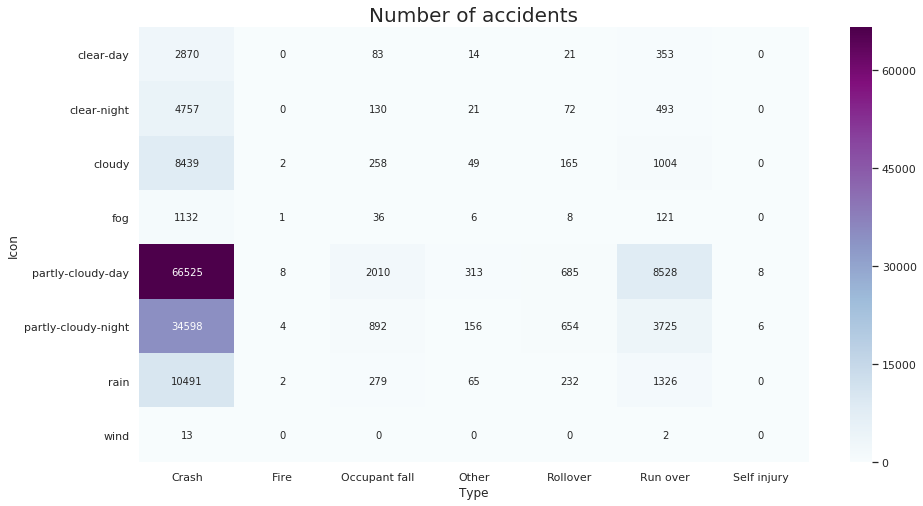

In [31]:
fig = plt.figure(figsize=(15,8))
map1 = sns.heatmap(type_icon, annot=True, fmt="d", cmap='BuPu')
plt.title('Number of accidents', fontsize=20)
plt.xlabel('Type')
plt.ylabel('Icon')
plt.yticks(rotation=0)
plt.show()

In [47]:
severity_icon=pd.crosstab(accidents_All1.icon,accidents_All1.severity)
severity_icon

severity,Fatality,Injury,Material damage
icon,,,
clear-day,46,981,2314
clear-night,107,1872,3494
cloudy,152,3507,6258
fog,19,334,951
partly-cloudy-day,1143,23828,53106
partly-cloudy-night,757,13456,25822
rain,233,4442,7720
wind,1,4,10


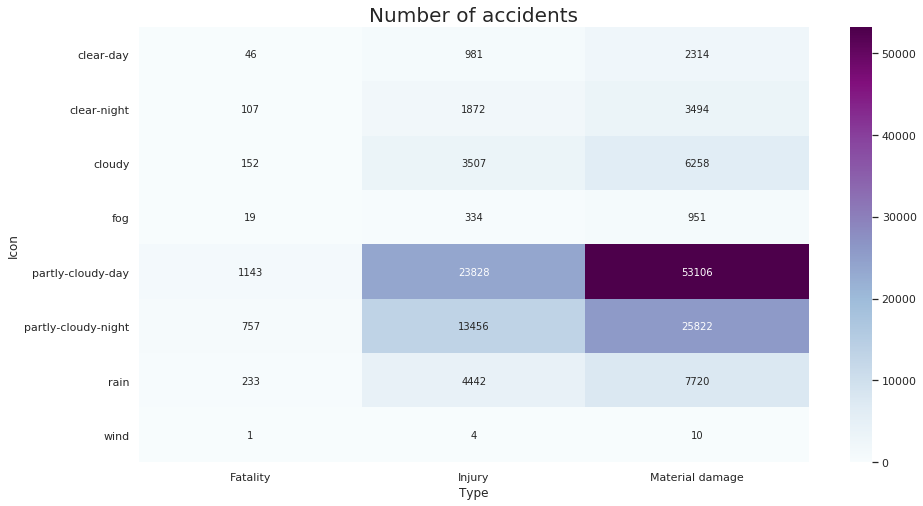

In [48]:
fig = plt.figure(figsize=(15,8))
map1 = sns.heatmap(severity_icon, annot=True, fmt="d", cmap='BuPu')
plt.title('Number of accidents', fontsize=20)
plt.xlabel('Type')
plt.ylabel('Icon')
plt.yticks(rotation=0)
plt.show()

In [29]:
summary_type=pd.crosstab(accidents_All1.summary,accidents_All1.accident_type)
summary_type

accident_type,Crash,Fire,Occupant fall,Other,Rollover,Run over,Self injury
summary,,,,,,,
Clear,7627,0,213,35,93,846,0
Dangerously Windy and Mostly Cloudy,9,0,0,0,0,2,0
Foggy,1132,1,36,6,8,121,0
Heavy Rain,3,0,0,0,0,0,0
Humid and Mostly Cloudy,2,0,0,0,0,1,0
Humid and Partly Cloudy,10,0,0,0,1,3,0
Light Rain,4,0,0,0,0,1,0
Mostly Cloudy,53948,9,1517,236,711,6421,3
Overcast,8439,2,258,49,165,1004,0


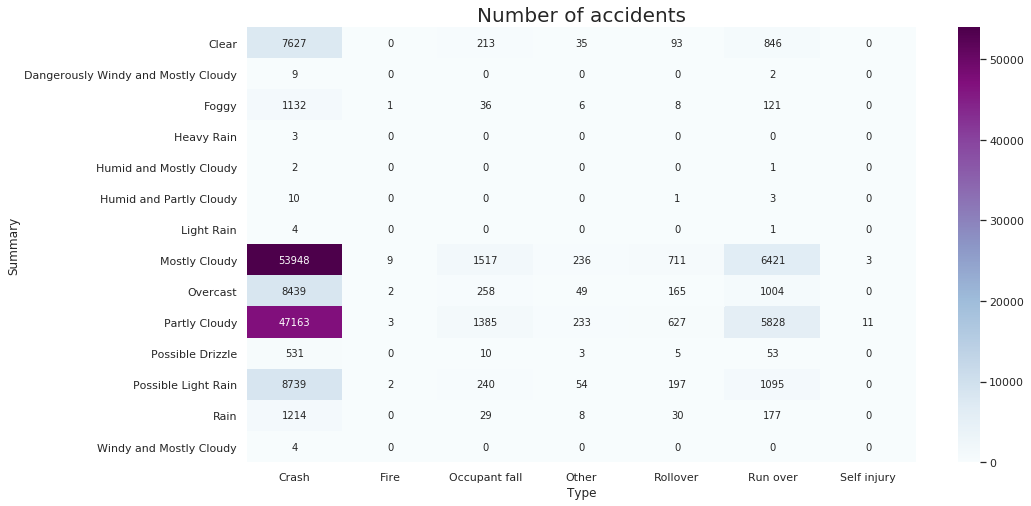

In [32]:
fig = plt.figure(figsize=(15,8))
map1 = sns.heatmap(summary_type, annot=True, fmt="d", cmap='BuPu')
plt.title('Number of accidents', fontsize=20)
plt.xlabel('Type')
plt.ylabel('Summary')
plt.yticks(rotation=0)
plt.show()

In [50]:
summary_severity=pd.crosstab(accidents_All1.summary,accidents_All1.severity)
summary_severity

severity,Fatality,Injury,Material damage
summary,,,
Clear,153,2853,5808
Dangerously Windy and Mostly Cloudy,1,3,7
Foggy,19,334,951
Heavy Rain,0,1,2
Humid and Mostly Cloudy,0,2,1
Humid and Partly Cloudy,1,6,7
Light Rain,0,1,4
Mostly Cloudy,956,19690,42199
Overcast,152,3507,6258


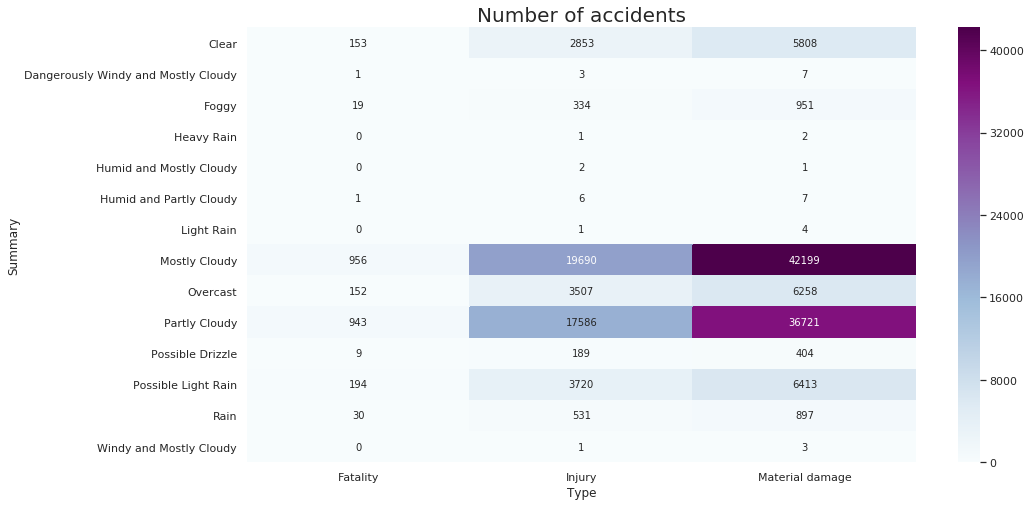

In [51]:
fig = plt.figure(figsize=(15,8))
map1 = sns.heatmap(summary_severity, annot=True, fmt="d", cmap='BuPu')
plt.title('Number of accidents', fontsize=20)
plt.xlabel('Type')
plt.ylabel('Summary')
plt.yticks(rotation=0)
plt.show()

In [40]:
accidents_All1[['month','precipIntensity']].groupby('month').agg(['mean','max','min'])

precipIntensity              
                 mean      max  min
month                              
1            0.100656   4.4669  0.0
2            0.092029   5.0130  0.0
3            0.144437   5.5322  0.0
4            0.186541   4.6145  0.0
5            0.165624   5.3075  0.0
6            0.144889  20.7540  0.0
7            0.130657   4.3291  0.0
8            0.056141   2.2244  0.0
9            0.218574   7.0199  0.0
10           0.307916   5.5910  0.0
11           0.273159   5.5296  0.0
12           0.182995   4.7115  0.0

In [79]:
p=accidents_All1[['borough','precipIntensity','temperature']].groupby('borough').mean()
p

,precipIntensity,temperature
borough,,
ANTONIO NARIÑO,0.163732,14.169754
BARRIOS UNIDOS,0.163394,14.167463
BOSA,0.193368,14.405374
CANDELARIA,0.161242,13.216553
CHAPINERO,0.158000,13.834235
CIUDAD BOLIVAR,0.190681,13.632831
ENGATIVA,0.162100,14.212741
FONTIBON,0.178958,14.269981
KENNEDY,0.183687,14.251102


In [39]:
accidents_All1[['month','temperature']].groupby('month').agg(['mean','max','min'])

temperature             
             mean    max   min
month                         
1       13.590798  23.92  1.18
2       14.182278  27.01  2.03
3       14.447495  24.00  3.04
4       14.377852  22.03  2.72
5       14.456883  24.00  5.71
6       13.994585  26.98  5.44
7       13.826399  27.00  5.17
8       13.795901  38.00  4.18
9       13.912274  33.98  3.04
10      13.912876  31.03  2.28
11      14.118745  24.04  5.17
12      13.802658  24.01  1.78

In [42]:
accidents_All1[['borough','temperature']].groupby('borough').agg(['mean','max','min'])

temperature             
                          mean    max   min
borough                                    
ANTONIO NARIÑO       14.169754  22.89  2.90
BARRIOS UNIDOS       14.167463  28.00  1.98
BOSA                 14.405374  28.01  2.00
CANDELARIA           13.216553  23.28  1.28
CHAPINERO            13.834235  26.71  1.72
CIUDAD BOLIVAR       13.632831  26.43  1.44
ENGATIVA             14.212741  38.00  1.99
FONTIBON             14.269981  27.00  2.00
KENNEDY              14.251102  31.03  2.02
LOS MARTIRES         13.920831  23.85  1.85
PUENTE ARANDA        14.093080  26.93  1.93
RAFAEL URIBE URIBE   14.158895  23.83  1.84
SAN CRISTOBAL        13.123270  23.02  2.03
SANTA FE             14.020097  30.79  1.78
SUBA                 13.948940  26.67  1.67
SUMAPAZ               7.778235  15.72  3.72
TEUSAQUILLO          14.067286  30.99  1.97
TUNJUELITO           14.220478  23.92  1.92
USAQUEN              14.050853  33.90  1.91
USME                 12.377489  23.18  1.18

In [81]:
p=accidents_All1[['severity','temperature']].groupby('severity').agg(['mean','median','max','min'])
p

temperature                    
                       mean  median   max   min
severity                                       
Fatality          14.091106  13.990  28.0  1.84
Injury            14.055684  13.915  38.0  1.28
Material damage   14.039147  13.910  38.0  1.18

In [44]:
accidents_All1[['severity','precipIntensity']].groupby('severity').agg(['mean','max','min'])

precipIntensity              
                           mean      max  min
severity                                     
Fatality               0.189611   6.6848  0.0
Injury                 0.190760  20.7540  0.0
Material damage        0.161203  16.5834  0.0

In [87]:
accidents_All1[['year','temperature']].groupby('year').agg(['mean','max','min','median'])

temperature                    
            mean    max   min median
year                                
2015   14.158686  28.03  2.19  14.01
2016   14.354792  33.98  1.28  14.01
2017   14.008842  38.00  1.18  13.91
2018   13.812491  27.01  1.67  13.68
2019   13.873506  21.91  5.98  13.57

In [86]:
accidents_All1[['year','precipIntensity']].groupby('year').agg(['mean','max','min','median'])

precipIntensity                     
                mean     max  min  median
year                                     
2015        0.000000   0.000  0.0  0.0000
2016        0.000000   0.000  0.0  0.0000
2017        0.000000   0.000  0.0  0.0000
2018        0.298665   5.591  0.0  0.0000
2019        0.634511  20.754  0.0  0.3671

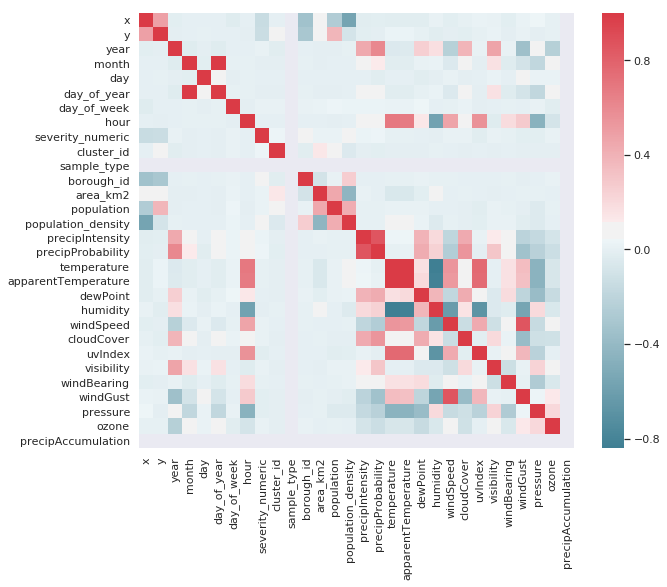

In [46]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = accidents_All1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax)

In [71]:
summary_year=pd.crosstab(accidents_All1.summary,accidents_All1.year)
summary_year

year,2015,2016,2017,2018,2019
summary,,,,,
Clear,2443,2533,2240,1028,570
Dangerously Windy and Mostly Cloudy,11,0,0,0,0
Foggy,194,542,447,112,9
Heavy Rain,0,0,0,0,3
Humid and Mostly Cloudy,3,0,0,0,0
Humid and Partly Cloudy,8,6,0,0,0
Light Rain,0,0,0,4,1
Mostly Cloudy,12594,14352,15443,10026,10430
Overcast,303,223,282,2473,6636


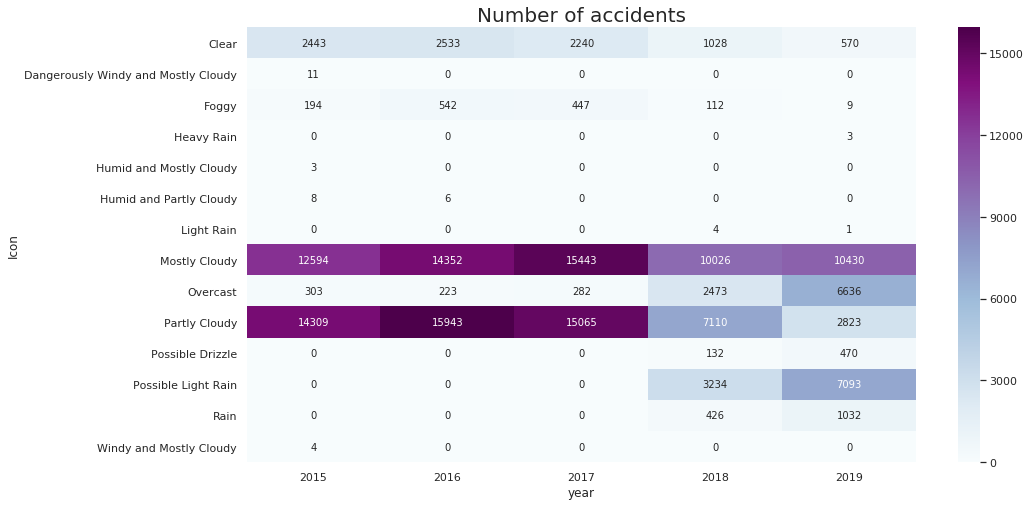

In [83]:
fig = plt.figure(figsize=(15,8))
map1 = sns.heatmap(summary_year, annot=True, fmt="d", cmap='BuPu')
plt.title('Number of accidents', fontsize=20)
plt.xlabel('year')
plt.ylabel('Icon')
plt.yticks(rotation=0)
plt.show()

In [74]:
precipAccumulation_year=pd.crosstab(accidents_All1.precipAccumulation,accidents_All1.year)
precipAccumulation_year

""


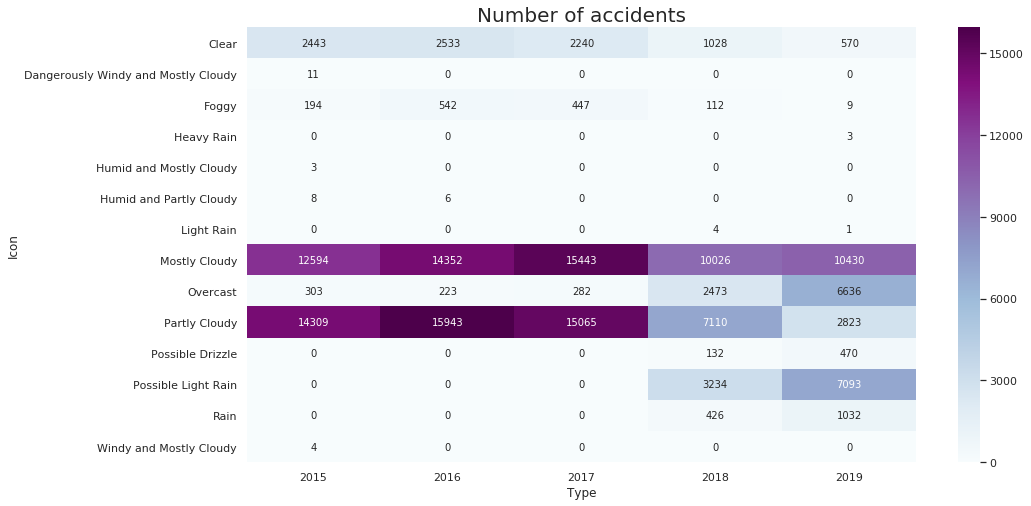

In [72]:
fig = plt.figure(figsize=(15,8))
map1 = sns.heatmap(precipAccumulation_year, annot=True, fmt="d", cmap='BuPu')
plt.title('Number of accidents', fontsize=20)
plt.xlabel('Type')
plt.ylabel('Icon')
plt.yticks(rotation=0)
plt.show()

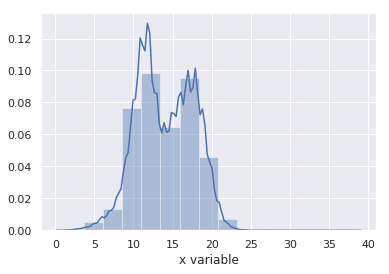

In [67]:
import pandas as pd
x = pd.Series(accidents_All1['temperature'][accidents_All1['temperature'].notnull()], name="x variable")
ax = sns.distplot(x, hist=True,bins=15)

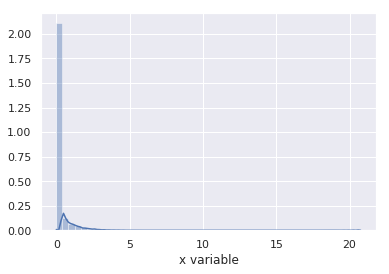

In [70]:
import pandas as pd
x = pd.Series(accidents_All1['precipIntensity'][accidents_All1['precipIntensity'].notnull()], name="x variable")
ax = sns.distplot(x, hist=True)